### Higgs Fit

RooFit example on fitting the 2-photon invariant mass to determine the number of Higgs signal events.

We rea dthe data set consisting of ~ 3000 2-photon invariant mass values from a tetx file (Hgg.txt) which should be in the current directory. 
Otherwise it can be downloaded from here: https://twiki.cern.ch/twiki/pub/Main/ROOTRioTutorial/Hgg.txt

In [1]:
   TTree tree("tree","tree");
   int nevt = tree.ReadFile("Hgg.txt","x");
   if (nevt <= 0) {
      Error("fitHgg","Error reading data from input file ");
   }
   std::cout << "Read " << nevt << " from the file " << std::endl;

Read 30770 from the file 


We make now the RooFit model using the RooWorkspace Factory 

In [2]:
 RooWorkspace w("w");
   w.factory("x[110,160]");  // invariant mass
   
   w.factory("nbackground[10000, 0, 10000]");
   //w.factory("Exponential::z1(x, a1[-1,-10,0])");
   w.var("nbackground")->setVal(nevt);
   w.var("nbackground")->setMin(0.1*nevt);
   w.var("nbackground")->setMax(10*nevt);

   // create exponential model as two components
   w.factory("a1[ 7.5, -500, 500]");
   w.factory("a2[-1.5, -500, 500]");
   w.factory("expr::z('-(a1*x/100 + a2*(x/100)^2)', a1, a2, x)");
   w.factory("Exponential::bmodel(z, 1)");
  
   w.factory("b0[0, -10, 10]");
   w.factory("b1[0, -10, 10]");
   w.factory("b2[0, -10, 10]");
   w.factory("Chebychev::bmodel_pol(x,{b0,b1,b2})"); 

   // signal model   
   w.factory("nsignal[100, 0.0, 1000.0]");
   //w.factory("mass[%f, %f, %f]' % (massguess, massmin, massmax))
   w.factory("mass[130, 110, 150]");
   w.factory("width[1, 0.5, 5]");
   w.factory("Gaussian::smodel(x, mass, width)");
   RooAbsPdf * smodel = w.pdf("smodel");
 
   w.factory("SUM::model(nbackground*bmodel_pol, nsignal*smodel)");
   RooAbsPdf * model = w.pdf("model");
   RooRealVar * x = w.var("x");


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [ ]:
w.Print();

We create now the RooFit data set importing the data from the ROOT tree.
We import also the data set in the workspace

In [3]:
RooDataSet data("data","data",*w.var("x"),RooFit::Import(tree) );
w.import(data);

[#1] INFO:Eval -- RooAbsReal::attachToTree(x) TTree Float_t branch x will be converted to double precision
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset data


we now fit the data

In [4]:
RooFitResult * r = nullptr;
RooPlot * plot = nullptr;

In [5]:
plot = w.var("x")->frame();
data.plotOn(plot);

In [ ]:
plot->Draw(); c1->Draw();

In [6]:
r = w.pdf("bmodel_pol")->fitTo(data, RooFit::Minimizer("Minuit2"),RooFit::Save(true), RooFit::Offset(true),RooFit::PrintLevel(1));

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
[#1] INFO:Minization -- RooNLLVar::evaluatePartition(nll_bmodel_pol_data) first = 0 last = 30770 Likelihood offset now set to 120373
MnSeedGenerator: for initial parameters FCN = 0
MnSeedGenerator: Initial state:   - FCN =                0 Edm =      3798.85 NCalls =     13
VariableMetric: start iterating until Edm is < 0.001
VariableMetric: Initial state   - FCN =                0 Edm =      3798.85 NCalls =     13
VariableMetric: Iteration #   0 - FCN =                0 Edm =      3798.85 NCalls =     13
VariableMetric: Iteration #   1 - FCN =  -2819.219586589 Edm =      223.616 NCalls =     21
VariableMetric: Iteration #   2 - FCN =  -3232.110389616 Edm =      39.8529 NCalls =     30
VariableMetric: Iteration #   3 - FCN =  -3265.443433725 Edm =     0.758509 NCalls =     38
VariableMetric: Iteration #   4 - FCN =  -3266.

Info in <Minuit2>: Minuit2Minimizer::Hesse : Hesse is valid - matrix is accurate


In [7]:
r = model->fitTo(data, RooFit::Minimizer("Minuit2"),RooFit::Save(true), RooFit::Offset(true));

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bmodel_pol,smodel)
Minuit2Minimizer: Minimize with max-calls 3500 convergence for edm < 1 strategy 1
[#1] INFO:Minization -- RooNLLVar::evaluatePartition(nll_model_data) first = 0 last = 30770 Likelihood offset now set to -156470
MnSeedGenerator: for initial parameters FCN = 0
MnSeedGenerator: Initial state:   - FCN =                0 Edm =      13019.6 NCalls =     29
MnSeedGenerator: Negative G2 found - new state:   - FCN =   -393.175930295 Edm =      14594.3 NCalls =    127
VariableMetric: start iterating until Edm is < 0.001
VariableMetric: Initial state   - FCN =   -393.175930295 Edm =      14594.3 NCalls =    127
VariableMetric: Iteration #   0 - FCN =   -393.175930295 Edm =      14594.3 NCalls =    1

Info in <Minuit2>: Minuit2Minimizer::Hesse : Hesse is valid - matrix is accurate


Plot of the fit result

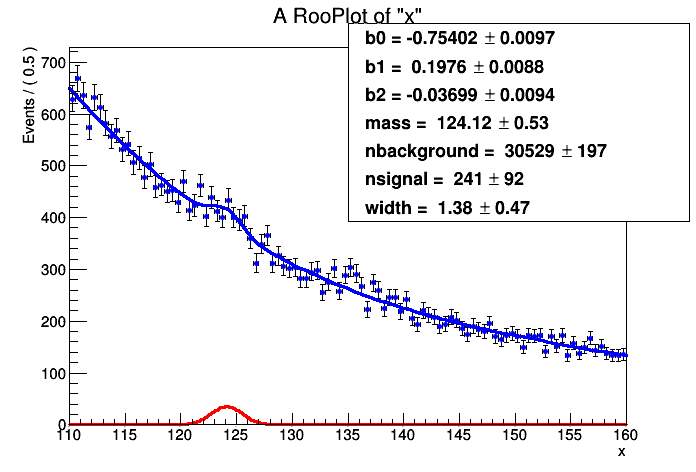

[#0] ERROR:Plotting -- RooAbsPdf::plotOn(model) ERROR: component selection expression 'bmodel' does not select any components of p.d.f.
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (smodel)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [8]:

model->plotOn(plot);
model->plotOn(plot, RooFit::Components("bmodel"),RooFit::LineStyle(kDashed));
model->plotOn(plot, RooFit::Components("smodel"),RooFit::LineColor(kRed));
model->paramOn(plot);

plot->Draw();
c1->Draw();

Before saving the workspace we create the RooStats model config object which is needed for the RooStats tools.

In [9]:
RooStats::ModelConfig mc("ModelConfig",&w);
mc.SetPdf(*w.pdf("model"));
mc.SetParametersOfInterest(*w.var("nsignal"));
mc.SetObservables(*w.var("x"));
// define set of nuisance parameters
w.defineSet("nuisParams","a1,a2,nbackground");

mc.SetNuisanceParameters(*w.set("nuisParams"));
mc.Print();


=== Using the following for ModelConfig ===
Observables:             RooArgSet:: = (x)
Parameters of Interest:  RooArgSet:: = (nsignal)
Nuisance Parameters:     RooArgSet:: = (a1,a2,nbackground)
PDF:                     RooAddPdf::model[ nbackground * bmodel_pol + nsignal * smodel ] = 0.796066



We want to semplify the H->gg model (for speeding-up ) the RooStats calculations, by assuming that the mass and the sigma of the signal are known and do not vary in the fits. We set them to constant

In [10]:
w.var("mass")->setConstant(true);
w.var("width")->setConstant(true);
w.import(mc);

In [11]:
w.writeToFile("HiggsModel_polbkg.root",true);
w.Print();


RooWorkspace(w) w contents

variables
---------
(a1,a2,b0,b1,b2,mass,nbackground,nsignal,width,x)

p.d.f.s
-------
RooExponential::bmodel[ x=z c=1 ] = 0.000616625
RooChebychev::bmodel_pol[ x=x coefList=(b0,b1,b2) ] = 0.802362
RooAddPdf::model[ nbackground * bmodel_pol + nsignal * smodel ] = 0.796066
RooGaussian::smodel[ x=x mean=mass sigma=width ] = 3.47579e-14

functions
--------
RooFormulaVar::z[ actualVars=(a1,a2,x) formula="-(a1*x/100+a2*(x/100)^2)" ] = -7.39125

datasets
--------
RooDataSet::data(x)

named sets
----------
ModelConfig_NuisParams:(a1,a2,nbackground)
ModelConfig_Observables:(x)
ModelConfig_POI:(nsignal)
nuisParams:(a1,a2,nbackground)

generic objects
---------------
RooStats::ModelConfig::ModelConfig

